In [264]:
%matplotlib inline
import pandas as pd
import numpy as np

#Importing the graphing libraries for plotting visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing modules from the scikit learn library to make predictions 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [265]:
df = pd.read_csv('indian_liver_patient (1).csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [266]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [267]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [269]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [270]:
print(df.shape)

(583, 11)


In [271]:
# Dataset should be cleaned and must have values of either 1 or 0.
df['Dataset'] = df['Dataset'].replace(to_replace = 2, value = 0)

In [272]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [273]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [274]:
df = df.interpolate()
df.isnull().sum()
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Correlations - 

In [275]:
# Check which column has the highest correlation
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.217729,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207283,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201209,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.235418,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.003585,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070910,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.232932,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686525,-0.161388
Albumin_and_Globulin_Ratio,-0.217729,-0.207283,-0.201209,-0.235418,-0.003585,-0.070910,0.232932,0.686525,1.000000,-0.165902
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.165902,1.000000


In [276]:
#print(min(df['Dataset'].corr()))

Make a decision to drop a column or not and give a solid reason behind it (if it is based on correlation then it is Total_proteins (But should you drop that ?)

In [277]:
# Column with least correlation can be dropped (The ones with the most )
# Total_Proteins has the least correlation value (0.03058) so it can be dropped ?
# drop rows with missing values with df.dropna(inplace=True)

In [278]:
# Number of people with age exceeding 89 (listed as being)
count = 0
for index,row in df.Age.iteritems():
    if(row==90):
        count+=1
     
print(count)    
        
# 572nd person is 

1


In [323]:
# Hypothesis Testing

# Are males above the age 45 more susceptible than women above the age of 45 - take count of both and compare

#Filtering the males
ismale=df['Gender']=="Male"
dfm=df[ismale]
#Filtering the males above 45
isu45=dfm['Age']>45
dfm_45=dfm[isu45]
hm=0
uhm=0

for i in dfm_45['Dataset']:
        if(i==0):
            hm+=1
        else:
            uhm+=1

#Filtering the females
isfemale=df['Gender']=="Female"
dff=df[isfemale]
#Filtering the females above 45
isu45=dff['Age']>45
dff_45=dff[isu45]
hf=0
uhf=0

for i in dff_45['Dataset']:
        if(i==0):
            hf+=1
        else:
            uhf+=1

total_people=583
total_males=hm+uhm
total_females=hf+uhf
total_healthy=hm+hf
total_unhealthy=uhm+uhf
observed=[[hm,uhm],[hf,uhf]]
expected=[[0,0],[0,0]]

expected[0][0]=total_males*total_healthy/583
expected[0][1]=total_males*total_unhealthy/583
expected[1][0]=total_females*total_healthy/583
expected[1][1]=total_females*total_unhealthy/583

chi_squared=0
for i in range(1):
    for j in range(1):
        chi_squared+=((observed[i][j]-expected[i][j])**2)/expected[i][j]

critcal_value=0.004 #from the table

if(chi_squared>critcal_value):
    print("Men above 45 are more succeptible to liver disesase than women above 45")
else:
    print("Men above 45 are less succeptible to liver disesase than women above 45")




Men above 45 are more succeptible to liver disesase than women above 45


In [280]:
# Acceptable range for all the proteins -
# Total_Bilirubin - 0.1-1.2 mg/dL
# Direct_Bilirubin - less than 0.3mg/dL
# Alkaline_Phosphotase - 44-147 IU/L or (0.73 - 2.45 microkatal/litre)
# Alamine_Aminotransferase - 20-60 IU/L
# Aspartate_Aminotransferase - Males (6-34 IU/L) and Females (8-40 IU/L)
# Total proteins - 6-8.3 g/dL
# Albumin - 3.4-5.4 g/dL
# Albumin and Globulin ratio - (1.457 - 1.695)  
# Dataset - Is always 1 or 2. - (Made to 1 or 0).

Data Visualisation

Count of people that have liver disease and those that do not. (1 indicates liver disease and 0 indicates no disease)

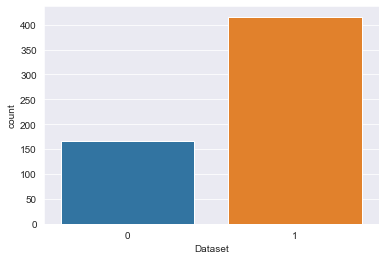

In [281]:
sns.countplot(label='count',x='Dataset',data=df);

Gender Based Distribution of the 'Dataset' column. (Explained above)

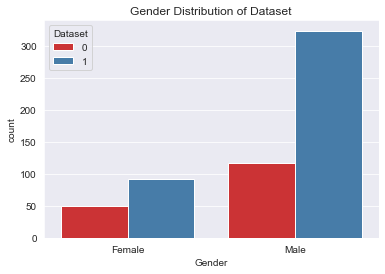

In [282]:
sns.countplot(x='Gender',data=df,hue='Dataset',palette = "Set1")
plt.title("Gender Distribution of Dataset")
plt.show()

Is Age a factor for liver disease for both male and female genders ?

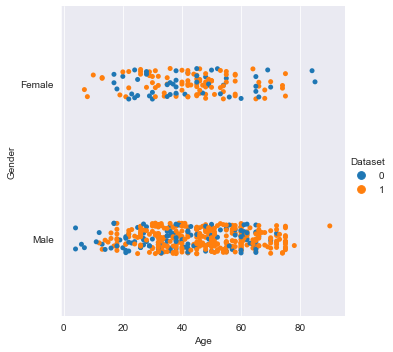

In [283]:
sns.catplot(x="Age",y="Gender",hue="Dataset",data=df)

In [284]:
# Used to be known as 'factorplot' in previous versions.

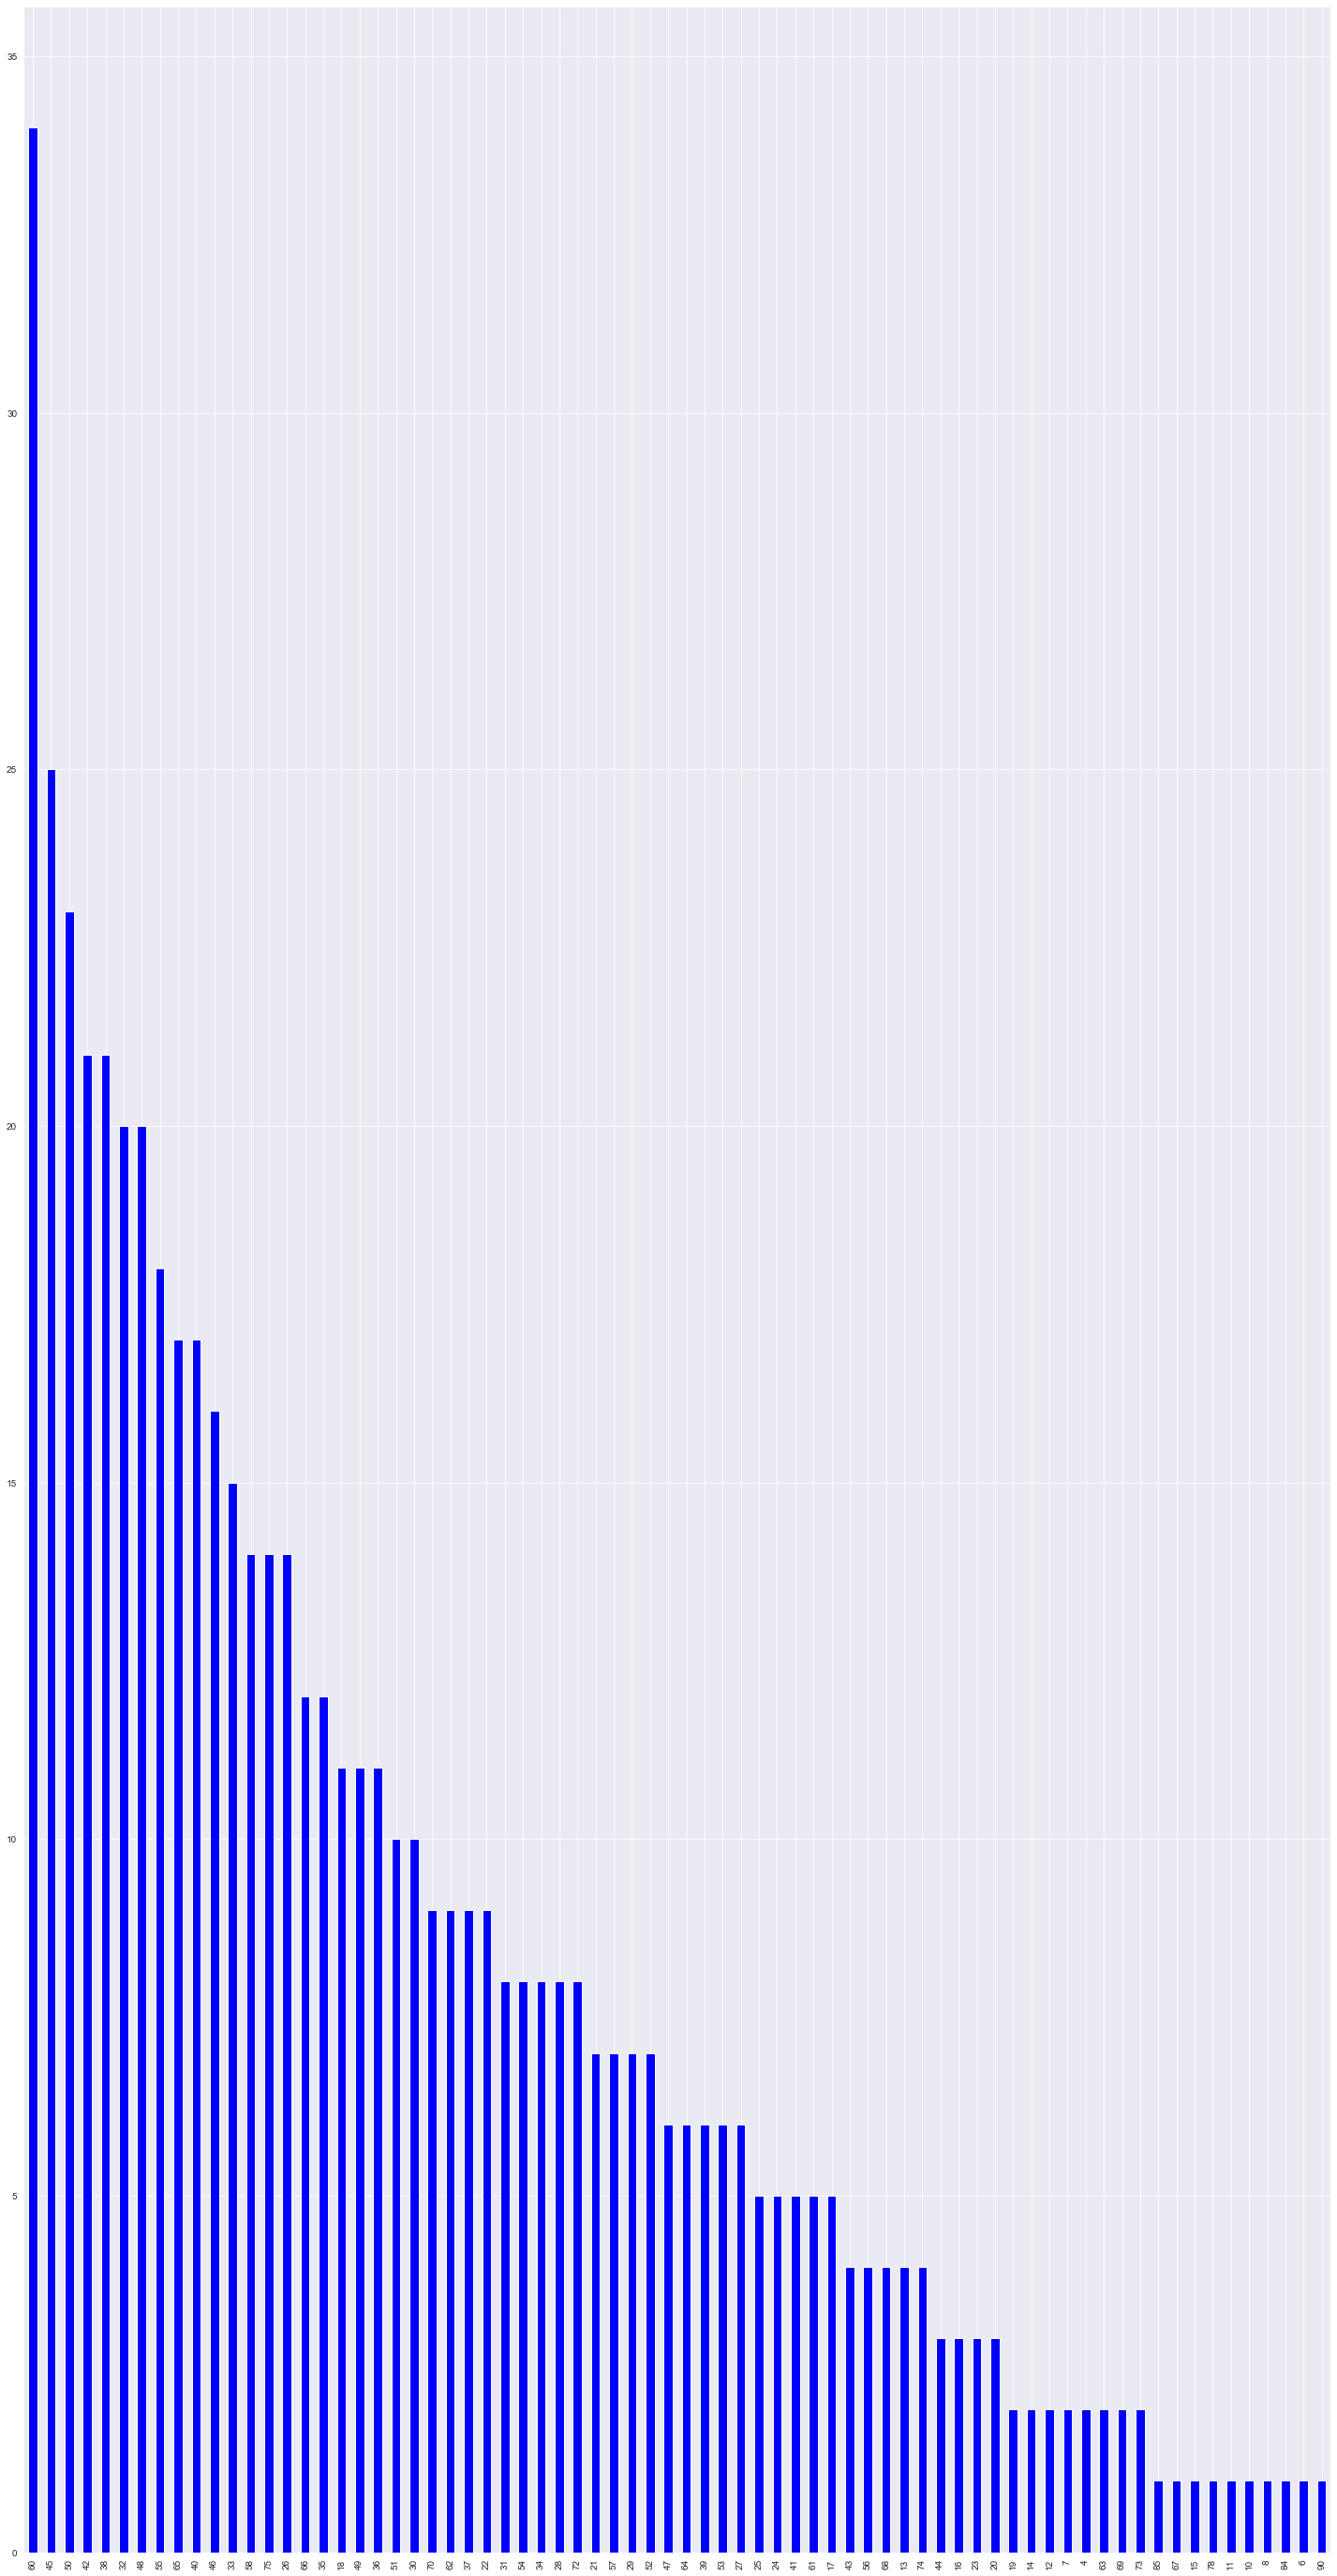

In [285]:
# Age group of liver patients 
sns.set_style('darkgrid')
plt.figure(figsize=(25,50))
df['Age'].value_counts().plot.bar(color='blue')

In [286]:
#Bar plots

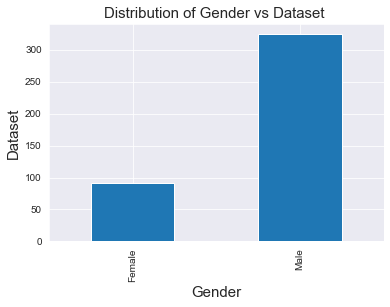

In [287]:
df.groupby('Gender').sum()["Dataset"].plot.bar()
plt.title('Distribution of Gender vs Dataset ',fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Dataset",fontsize=15)
plt.show()

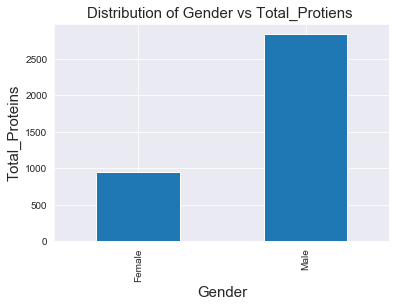

In [288]:
df.groupby('Gender').sum()["Total_Protiens"].plot.bar()
plt.title('Distribution of Gender vs Total_Protiens ',fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Total_Proteins",fontsize=15)
plt.show()

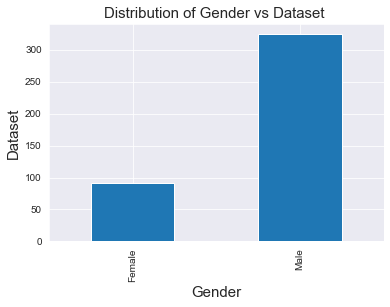

In [289]:
df.groupby('Gender').sum()["Dataset"].plot.bar()
plt.title('Distribution of Gender vs Dataset ',fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Dataset",fontsize=15)
plt.show()

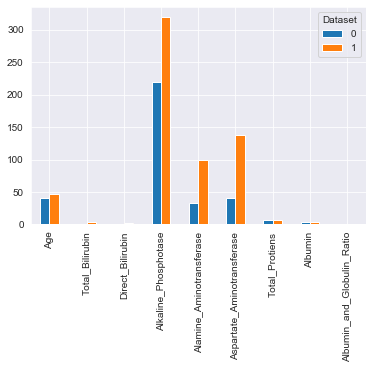

In [290]:
# Grouped bar chart
gb = df.groupby('Dataset').mean().T.plot(kind="bar")

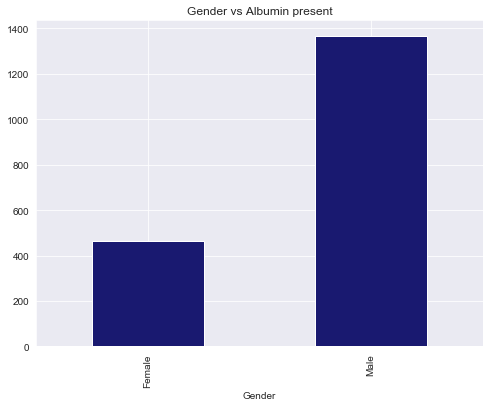

In [291]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')
plt.title("Gender vs Albumin present")
plt.show()

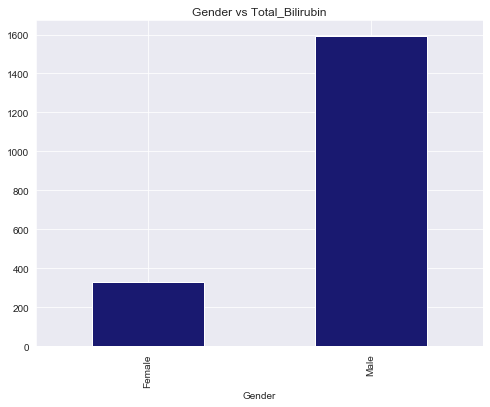

In [292]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='midnightblue')
plt.title("Gender vs Total_Bilirubin")
plt.show()

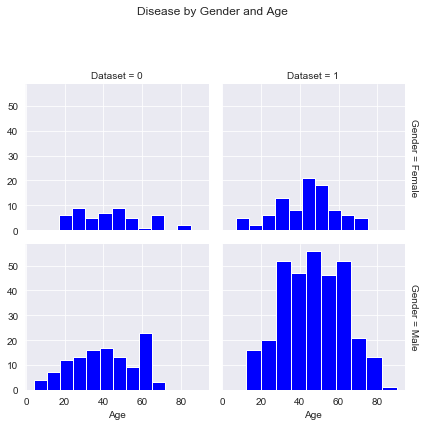

In [293]:
# Histograms - 
h = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
h.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Disease by Gender and Age');


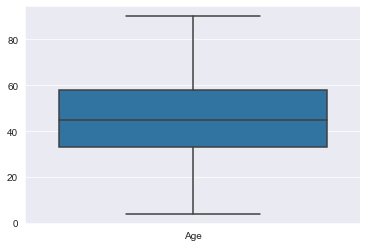

In [294]:
# Box Plot (Take boxplots of some specific visualizations)
bp = sns.boxplot(data = df[['Age']])

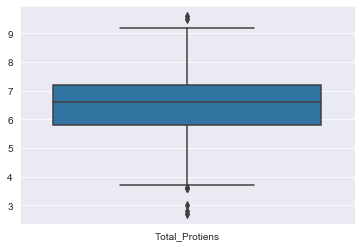

In [320]:
bp = sns.boxplot(data = df[['Total_Protiens']])

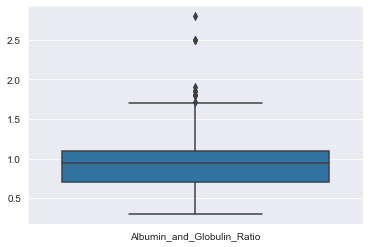

In [321]:
bp = sns.boxplot(data = df[['Albumin_and_Globulin_Ratio']])

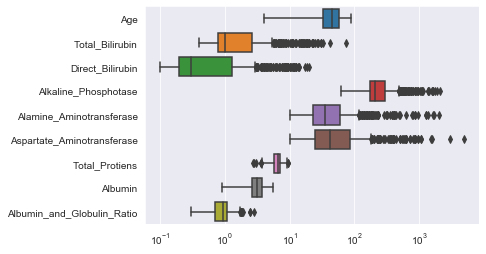

In [322]:
bp1 = sns.boxplot(data=df[['Age','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']], orient="h")
bp1.set_xscale('log')

In [297]:
#sns.clustermap(df)
'''g = sns.clustermap(df['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'], cmap="mako", robust=True)'''

'g = sns.clustermap(df[\'Age\', \'Total_Bilirubin\', \'Direct_Bilirubin\',\n       \'Alkaline_Phosphotase\', \'Alamine_Aminotransferase\',\n       \'Aspartate_Aminotransferase\', \'Total_Protiens\', \'Albumin\',\n       \'Albumin_and_Globulin_Ratio\'], cmap="mako", robust=True)'

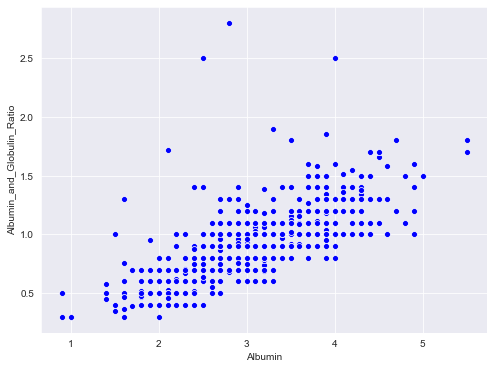

In [299]:
# Plotting a scatterplot for each pair of attributes in the dataset
# The diagonal shows histogram of each attribute 

f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='blue',data=df);
plt.show()

In [300]:
# Correlation Matrix

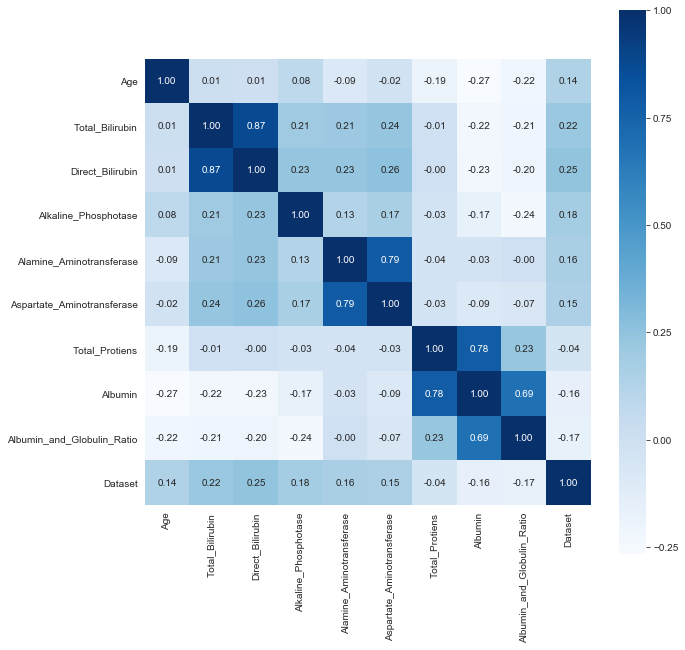

In [301]:
# Seaborn heatmap for representation 
corr = df.corr()
plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10},cmap = "Blues")

In [302]:
# Predict if patient has liver disease
# Using Linear regression
# Using - Binary logistic regression
# Using K Nearest Neighbours classifier.
# Calculate accuracy

Prediction of liver disease for patient

In [303]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [304]:
# Converting the categorical variable 'Gender' to a numerical indicator variable
pd.get_dummies(df['Gender'], prefix = 'Gender').head()
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [305]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not.
# We define 'X' to be our features and 'y' to be our target
X = df.drop(['Gender','Dataset'], axis=1)
X.head(3)
y = df['Dataset']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(408, 11)
(408,)
(175, 11)
(175,)


Predicting using Linear Regression

In [307]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)


Linear Regression Score: 
 13.14
Linear Regression Test Score: 
 8.0
Coefficient: 
 [ 2.52634393e-03  3.76437236e-04  2.31799531e-02  2.16581078e-04
  3.91862186e-04 -6.07137087e-05  5.32305870e-02 -7.77571459e-02
 -7.20856003e-02 -4.61298730e-02  4.61298730e-02]
Intercept: 
 0.4139932857080298


Prediciting using Logistic Regression

Logistic Regression Training Score: 
 73.77
Logistic Regression Test Score: 
 66.86
Coefficient: 
 [[ 0.01302059  0.02289396  0.49329019  0.00098828  0.01046368  0.00308709
   0.19422955 -0.19790312 -0.69743109 -0.45026447 -0.21984609]]
Intercept: 
 [-0.67011056]
Accuracy: 
 0.6685714285714286
Confusion Matrix: 
 [[ 13  38]
 [ 20 104]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.25      0.31        51
           1       0.73      0.84      0.78       124

    accuracy                           0.67       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.63      0.67      0.64       175



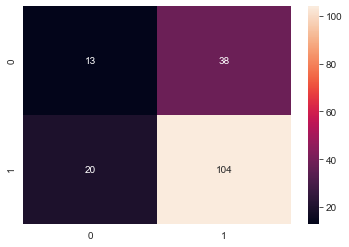

In [308]:
# Creating a logistic regression object
logreg = LogisticRegression()
# Training  the model using the training sets and check score
logreg.fit(X_train, y_train)

#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [309]:
# correlation with Age column is too less, if we had to drop one column it would be the Age column because it has the least correlation
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Column']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Column,Correlation
2,Direct_Bilirubin,0.493290
6,Total_Protiens,0.194230
1,Total_Bilirubin,0.022894
0,Age,0.013021
4,Alamine_Aminotransferase,0.010464
5,Aspartate_Aminotransferase,0.003087
3,Alkaline_Phosphotase,0.000988
7,Albumin,-0.197903
10,Gender_Male,-0.219846
9,Gender_Female,-0.450264


Based on this table we can see that Age has the least correlation, and hence can be dropped.

Albumin_and_Globulin_Ratio has the highest correlation 

Predicting using Random Forest 

In [310]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 68.57
Accuracy: 
 0.6857142857142857
[[ 19  32]
 [ 23 101]]
              precision    recall  f1-score   support

           0       0.45      0.37      0.41        51
           1       0.76      0.81      0.79       124

    accuracy                           0.69       175
   macro avg       0.61      0.59      0.60       175
weighted avg       0.67      0.69      0.68       175



In [311]:
# Comparison of the all the models - 
# We can rank the evaluations of all the models based on the Test score - 
models = pd.DataFrame({
    'Model': [ 'Linear Regression', 'Logistic Regression','Random Forest'],
    'Score': [ linear_score , logreg_score, random_forest_score],
    'Test Score': [ linear_score_test , logreg_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,68.57
1,Logistic Regression,73.77,66.86
0,Linear Regression,13.14,8.00


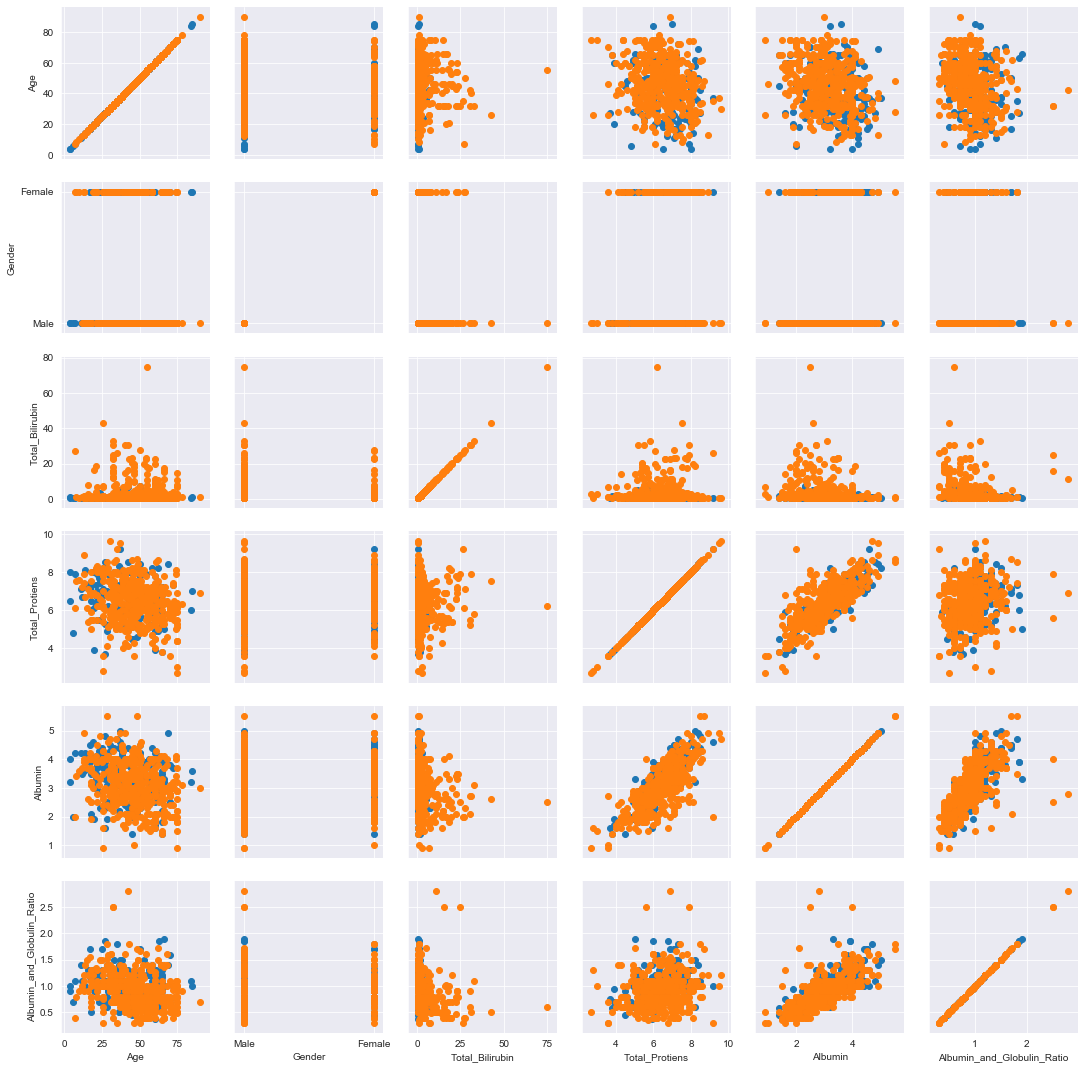

In [312]:
# Pairwise Grid Plot 
pair_grid = sns.PairGrid(df, hue="Dataset", vars=['Age','Gender','Total_Bilirubin','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'])
pair_grid.map(plt.scatter)
plt.show()

# Add more variables if needed to draw inference.

In [313]:
# Categorical plot of Age and Distribution with respect to Dataset column

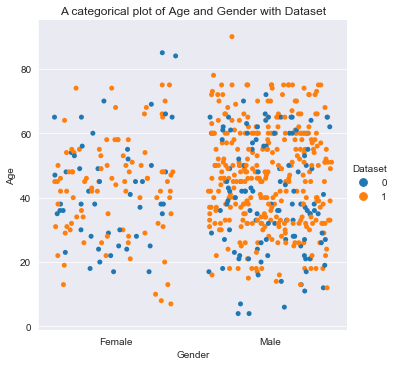

In [314]:
c = sns.catplot(data = df,y = 'Age', x='Gender',hue = 'Dataset',jitter = 0.4)
plt.title("A categorical plot of Age and Gender with Dataset")
plt.show(c)

Jointplot to check if Direct_Bilirubin and Total_Bilirubin,Alamine_Aminotransferase and Aspartate_Aminotransferase,Albumin and Albumin_and_Globulin_Ratio are linearly related.

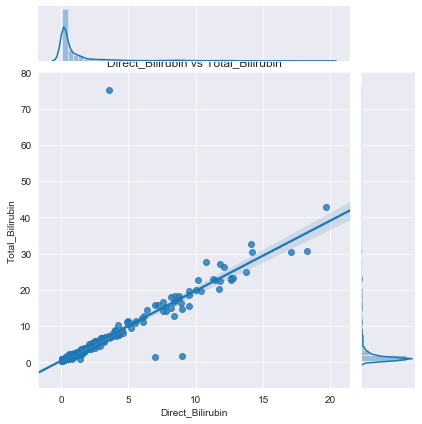

In [315]:
jp = sns.jointplot("Direct_Bilirubin", "Total_Bilirubin",data = df,kind = "reg")
plt.title("Direct_Bilirubin vs Total_Bilirubin")
plt.show(j)

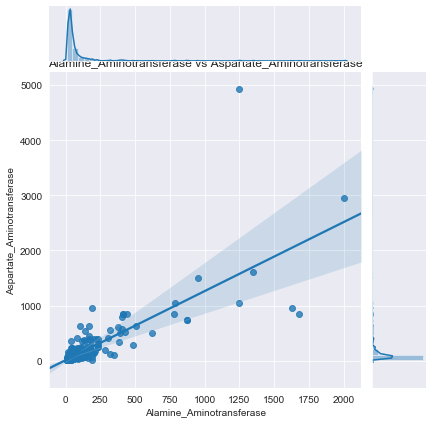

In [316]:
jp = sns.jointplot("Alamine_Aminotransferase", "Aspartate_Aminotransferase",data = df,kind = "reg")
plt.title("Alamine_Aminotransferase vs Aspartate_Aminotransferase")
plt.show(jp)

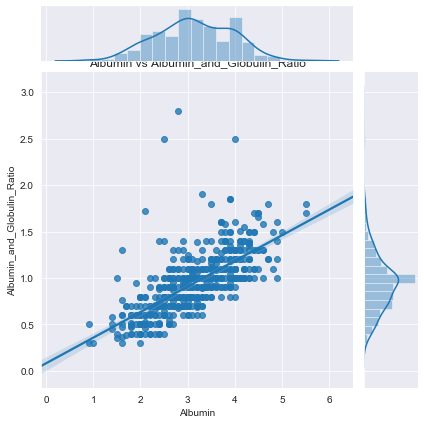

In [317]:
j = sns.jointplot("Albumin", "Albumin_and_Globulin_Ratio",data = df,kind = "reg")
plt.title("Albumin vs Albumin_and_Globulin_Ratio")
plt.show(j)

Conclusions drawn - 
1) The different variants of the proteins of the same type (Eg.  Aspartate and Alanine Transferase and Total and Direct Bilirubin are linearly correlated - as shown by the jointplots).


2) The skewness of the data towards men (in plots such as Gender vs Total_Bilirubin and Gender vs Albumin ) is due to a higher number of men in the dataset, as shown in the barplot.

3) The ‘Albumin_and_Globulin_Ratio’ column  has the highest correlation (about 0.64) with the ‘Dataset’ column. The ‘Age’ column has the lowest correlation with ‘Dataset’  , (0.013) and can be dropped if need be.

4) Prediction of Liver Disease has been been performed using Linear Regression, Logistic Regression and Random Forest and it was found that Random Forest gave the best accuracy since it takes a model subset of the features instead of all of them.


5) From the hypothesis test, it has been concluded that Men above 45 are more susceptible to liver disease than Women above 45.
